
# Voyage relativiste
---



## Le voyage

Le voyage d'un astronaute se déroule dans un vaisseau spatial qui se déplace le long d'une droite. Dans un référentiel inertiel, éloigné de toute masse (pas de gravitation), le vaisseau a une vitesse initiale nulle à $t=0$ et on lui applique une force constante $F$ pendant une durée $T$. Ainsi, il accélère pour atteindre une vitesse maximale à $t=T$, puis on lui applique une force $-F$ opposée à la précedente pour $T<t<3T$. Donc sa vitesse diminue, s'annule à $t=2T$, puis prend une valeur maximale à $t=3T$, opposée à celle atteinte à $t=T$. Pour $3T<t<4T$, on applique enfin la même force $F$ qu'au départ, de sorte qu'il ralentisse, puis retrouve son point de départ avec une vitesse nulle à $t=4T$.

L'astronaute à bord du vaisseau dispose d'une horloge qui mesure le **temps propre** noté $\tau$ au cours du voyage, initialisée à $0$ au départ. Une autre horloge restée au point de départ mesurera le temps $t$, initialisée aussi à $0$ au départ.

Quel seront les temps affichés par ces horloges à l'arrivée ?

C'est l'occasion de faire un peu de **relativité restreinte** avec des **mobiles accélérés**.

## Les calculs

Dans un référentiel inertiel, le principe fondamental de la dynamique en relativité restreinte s'écrit, pour une force $F$, une masse $m$ et une vitesse $v$ :

$$F=\dfrac{d}{dt}\left( m\gamma v \right)$$

avec :

$$\gamma=\dfrac{1}{\sqrt{1-v^2}}$$

On utilise ici des **unités réduites**, de sorte que $v=1$ corresponde à la vitesse de la lumière. Il en est de même pour la distance, avec $x=1$ qui correspond à la distance parcourue par la lumière pendant $t=1s$, soit $299792458$ m, soit **une seconde-lumière** (s.l.).

La force $F$ est choisie constante, avec $F=mg$, de sorte que l'astronaute **ressente la pesanteur terrestre** ($g=9.81/299792458$ s.l./s^2, attention aux unités). Pour illustrer le principe du calcul, on ne développera que sa première étape, pour $0<t<T$.

En intégrant $F=\dfrac{d}{dt}\left( m\gamma v \right)=mg$, on obtient :

$$\gamma v=gt$$

Ainsi :

$$v=\dfrac{gt}{\sqrt{1+(gt)^2}}$$

La vitesse $v$ ne dépasse jamais $1$ dans ce contexte relativiste. La métrique permettant d'accéder à la variation de temps propre $d\tau$ pour une variation de temps $dt$ et un déplacement $dx$ dans le référentiel inertiel est :

$$d\tau^2=dt^2-dx^2$$

(la forme simple de cette métrique résulte du fait que l'on a utilisé des unités réduites)

Ainsi :

$$\left(\dfrac{d\tau}{dt}\right)^2=1-\left(\dfrac{dx}{dt}\right)^2=1-v^2=\dfrac{1}{1+(gt)^2}$$

Soit :

$$\dfrac{d\tau}{dt}=\dfrac{1}{\sqrt{1+(gt)^2}}$$

$$\dfrac{dx}{dt}=\dfrac{gt}{\sqrt{1+(gt)^2}}$$

Une **intégration numérique** donnera accès à $\tau$ et $x$ en fonction de $t$, avec un pas temporel de calcul suffisament petit (on peut déjà procéder ainsi sans être "expert en calcul littéral des intégrales").

La distance $x$ et le temps $t$ permettront de tracer des **lignes d'univers** ($x$ en abscisse et $t$ en ordonnée), sur lesquelles on visualisera le temps propre $\tau$ via des points correspondant à des intervalles réguliers de temps propre. Pour les échelles lors du tracé des courbes, on choisira plutôt le **jour** comme unité de temps et le **jour-lumière** comme unité de distance.

On effectuera aussi une comparaison avec une version très simplifiée du voyage où la vitesse est constante à l'aller et au retour et la distance parcourue identique.

## Le programme

In [29]:
import numpy as np
import matplotlib.pyplot as plt


def d_tau_sur_dt(g, t):
    return np.sqrt(1/(1+g**2*t**2))


def vitesse(g, t):
    return g*t/np.sqrt(1+g**2*t**2)

# T : un quart de la durée du voyage, en secondes
# g : accélération de la pesanteur ressentie, en m/s^2
# pasdelta : écart de temps entre deux points sur les lignes d'univers, en secondes


def calcul_dis_tau(T=3600*24*1000, g=9.81, pasdelta=3600*24*100):
    # pas temporel de calcul pour l'intégration numérique
    pas = T/1e4
    # vitesse de la lumière en m/s
    c = 299792458
    # accélération en unité réduite
    g = g/c

    # 0<t<T
    ts = np.arange(0, T, pas)
    dtt = d_tau_sur_dt(g, ts)
    vit = vitesse(g, ts)
    t = ts.copy()

    # T<t<3*T
    ts = np.arange(-T, T, pas)
    dtt = np.append(dtt, d_tau_sur_dt(g, ts))
    vit = np.append(vit, -vitesse(g, ts))
    t = np.append(t, 2*T+ts)

    # 3*T<t<4*T
    ts = np.arange(0, T+pas, pas)
    dtt = np.append(dtt, d_tau_sur_dt(g, T-ts))
    vit = np.append(vit, -vitesse(g, T-ts))
    t = np.append(t, 3*T+ts)

    # intégration numérique
    dis = pas*np.cumsum(vit)
    tau = pas*np.cumsum(dtt)

    # calculs en vitesse constante
    dis_max = np.max(dis)
    V = dis_max/(2*T)
    tau2 = t*np.sqrt(1-V**2)
    vit2 = V*(t < 2*T)-V*(t >= 2*T)
    dis2 = pas*np.cumsum(vit2)

    # calculs pour le tracé de tau à intervalles temporels réguliers
    deltat = np.arange(0, t[-1], pasdelta)
    indext = [np.where(t >= dt)[0][0] for dt in deltat]
    deltatau = np.arange(0, tau[-1], pasdelta)
    indextau = [np.where(tau >= dt)[0][0] for dt in deltatau]
    deltatau2 = np.arange(0, tau2[-1], pasdelta)
    indextau2 = [np.where(tau2 >= dt)[0][0] for dt in deltatau2]

    # conversions en jours et en jours-lumière
    t = t/(3600*24)
    tau = tau/(3600*24)
    tau2 = tau2/(3600*24)
    dis = dis/(3600*24)
    dis2 = dis2/(3600*24)

    # affichage des résultats en texte
    print('\nRésultats numériques\n')
    print(f'Accélération ressentie : {g*c:.2f} m/s^2')
    print(f'Temps t final: {max(t)/365.25:.2f} années ({max(t):.2f} jours)')
    print(
        f'Temps tau final: {max(tau)/365.25:.2f} années ({max(tau):.2f} jours)')
    print(f'Vitesse maximale atteinte : {max(vit):.3f}c')
    print(
        f'Distance atteinte : {max(dis)/365.25:.2f} années-lumière ({max(dis):.2f} jours-lumière)')
    print('\nGraphiques\n')

    # tracés des graphiques
    plt.figure()
    plt.plot(t, t, 'r', label='temps (référentiel inertiel)')
    plt.plot(t, tau, 'b', label='temps propre (force constante)')
    plt.plot(t, tau2, 'g', label='temps propre (vitesse uniforme)')
    plt.xlabel('temps (jours)')
    plt.ylabel('temps propre (jours)')
    plt.grid('on')
    plt.text(t[-1], t[-1], f'{t[-1]:.2f} jours',
             ha='right', c='r', weight='bold')
    plt.text(t[-1], tau[-1], f'{tau[-1]:.2f} jours',
             ha='right', c='b', weight='bold')
    plt.text(t[-1], tau2[-1], f'{tau2[-1]:.2f} jours',
             ha='right', c='g', weight='bold')
    plt.legend()

    plt.figure()
    plt.plot(t, vit, 'b', label='vitesse (force constante)')
    plt.plot(t, vit2, 'g', label='vitesse (vitesse uniforme)')
    plt.grid('on')
    plt.xlabel('temps (jours)')
    plt.ylabel('vitesse (v/c)')
    n = np.where(t >= T/(3600*24))[0][0]
    plt.text(t[n], vit[n], f'{vit[n]:.3f}c', ha='right', c='b', weight='bold')
    plt.text(t[n], vit2[n], f'{vit2[n]:.3f}c',
             ha='right', c='g', weight='bold')
    plt.legend()

    plt.figure()
    plt.plot(np.zeros(len(t)), t, 'r', label='référentiel inertiel')
    plt.plot(dis, t, 'b', label='force constante')
    plt.plot(dis2, t, 'g', label='vitesse constante')
    plt.grid('on')
    plt.title('Lignes d\'univers')
    plt.ylabel('temps (jours)')
    plt.xlabel('distance (jours-lumière)')
    plt.legend()

    plt.figure()
    plt.plot(np.zeros(len(t)), t, 'r', label='référentiel inertiel', lw=0.5)
    plt.plot(np.zeros(len(indext)), t[indext], 'r.', ms=8)
    plt.plot(0, t[-1], 'r.', ms=8)
    plt.plot(dis, t, 'b', label='force constante', lw=0.5)
    plt.plot(dis[indextau], t[indextau], 'b.', ms=8)
    plt.plot(dis2, t, 'g', label='vitesse constante', lw=0.5)
    plt.plot(dis2[indextau2], t[indextau2], 'gx', ms=6)
    plt.grid('on')
    plt.ylabel('temps (jours)')
    plt.xlabel('distance (jours-lumière)')
    plt.title(
        f'Lignes d\'univers (pas de temps={pasdelta/(3600*24):.2f} jours)')
    plt.legend()

    plt.show()


## Les tracés


Résultats numériques

Accélération ressentie : 9.81 m/s^2
Temps t final: 10.95 années (4000.00 jours)
Temps tau final: 6.83 années (2493.49 jours)
Vitesse maximale atteinte : 0.943c
Distance atteinte : 3.87 années-lumière (1414.01 jours-lumière)

Graphiques



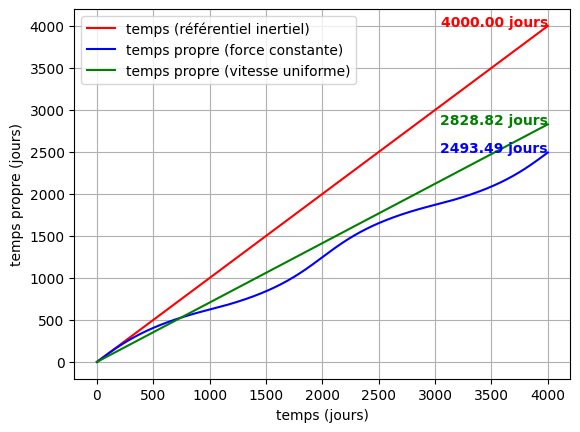

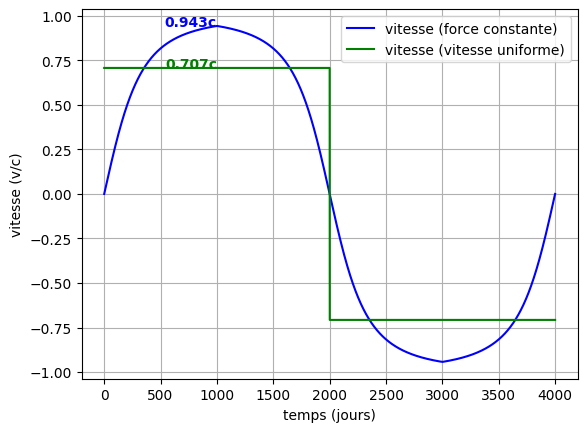

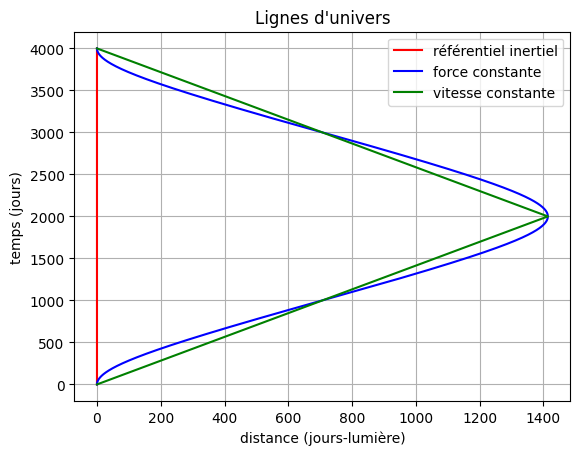

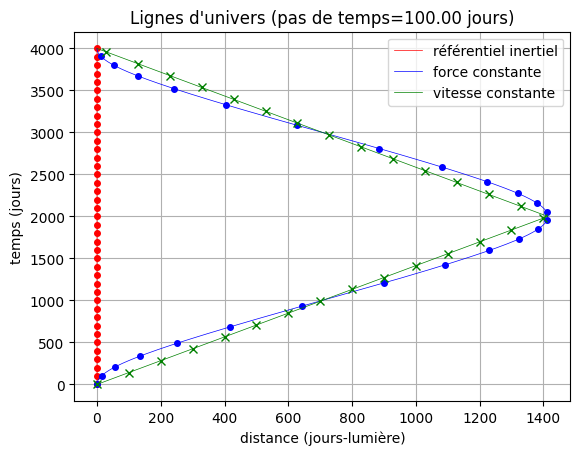

In [30]:
# T : un quart de la durée du voyage, en secondes
# g : accélération de la pesanteur ressentie, en m/s^2
# pasdelta : écart de temps entre deux points sur les lignes d'univers, en secondes
calcul_dis_tau(T=3600*24*1000,g=9.81,pasdelta=3600*24*100)

## Résultats

Pour les tracés, on a choisi $T=1000$ jours. C'est le temps mis pour atteindre la vitesse $v=0.94$ avec une force appliquée qui est constante, de sorte de l'astronaute ressente une pesanteur comparable à celle qu'il ressentirait sur Terre. Le voyage au complet dure $4000$ jours pour un observateur resté sur place au point de départ. L'horloge dans le vaisseau affiche $2493.49$ jours à la fin du voyage.

Avec le calcul classique où la vitesse est uniforme ($v=0.71$), l'horloge afficherait $2828.82$ jours à la fin du voyage.

La distante atteinte lors du demi-tour est de $1414.01$ jours-lumière pour les deux configurations.

## Conclusion

L'idée ici était de proposer une version réaliste du voyage, où l'astronaute subit une gravité apparente de l'ordre de celle qu'il subit sur Terre. Lorsque la force change de signe, il y a évidemment un changement notable où "le sol devient le plafond" dans le vaisseau, mais ce n'est pas insurmontable.

Avec le calcul classique où la vitesse change brusquement de signe au milieu du voyage, on n'est plus du tout dans le contexte réaliste envisagé.

Mais si on veut s'interroger un peu plus sur le réalisme du voyage, il faut remarquer que la force appliquée serait de l'ordre de celle qu'il faut appliquer ... pour faire décoller une fusée au départ de la Terre ! Pour cette fusée, il faut une énergie énorme qui est par ailleurs fournie sur une durée de l'ordre de quelques dizaines de secondes au moment de son décollage.

Et dans le voyage proposé, il faudrait appliquer cette force pendant $4000$ jours. Donc on ne peut que rester dans l'exercice de pensée 😏

## Documents

Voyage relativiste : https://fr.wikipedia.org/wiki/Voyage_relativiste

The Relativistic Rocket :
https://math.ucr.edu/home/baez/physics/Relativity/SR/Rocket/rocket.html

Diagramme de Bondi : https://www.youtube.com/watch?v=mECIZ-jULjQ

Simultanéité : https://www.youtube.com/watch?v=jib6EababqA

## Proxima Centauri


Résultats numériques

Accélération ressentie : 10.00 m/s^2
Temps t final: 11.80 années (4309.95 jours)
Temps tau final: 7.03 années (2569.49 jours)
Vitesse maximale atteinte : 0.952c
Distance atteinte : 4.30 années-lumière (1569.99 jours-lumière)

Graphiques



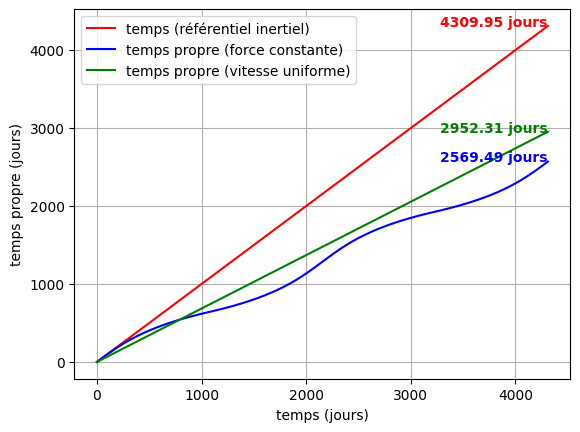

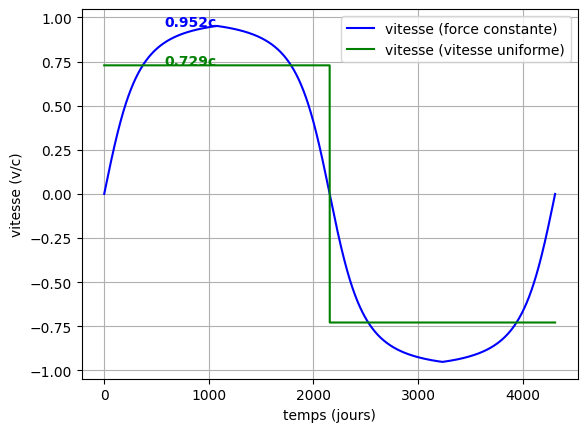

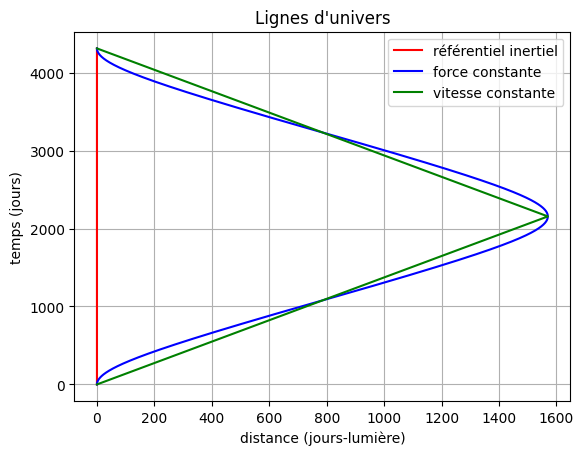

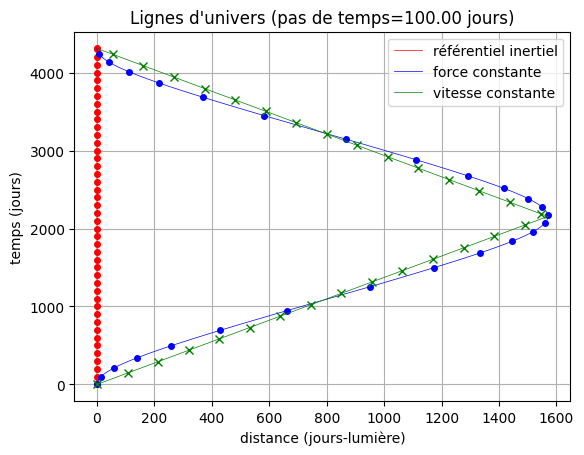

In [31]:
calcul_dis_tau(T=3600*24*365.25*11.8/4,g=10,pasdelta=3600*24*100)